### Exploratory Data Analysis (EDA)


<center>
    <img src="CustomerChurn.jpeg" alt="CUSTOMER_CHURN" width="800" height="400">
</center>

#### Import necessary libraries

In [35]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [36]:
# suppress warnings
warnings.filterwarnings("ignore")

#### Loan dataset

In [37]:
# load the dataset
data = pd.read_csv(r'../dataset/source/customers.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### 1️⃣ Data Understanding

**Objectives:**
* Know what each column represents.
* Identify data types (numerical, categorical, datetime, text, etc.).
* Understand the shape and format.
  

In [38]:
# display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Geography          10000 non-null  object 
 5   Gender             10000 non-null  object 
 6   Age                10000 non-null  int64  
 7   Tenure             10000 non-null  int64  
 8   Balance            10000 non-null  float64
 9   NumOfProducts      10000 non-null  int64  
 10  HasCrCard          10000 non-null  int64  
 11  IsActiveMember     10000 non-null  int64  
 12  EstimatedSalary    10000 non-null  float64
 13  Exited             10000 non-null  int64  
 14  Complain           10000 non-null  int64  
 15  SatisfactionScore  10000 non-null  int64  
 16  CardType           1000

In [39]:
# check for missing values
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Complain             0
SatisfactionScore    0
CardType             0
PointEarned          0
dtype: int64

In [40]:
# count unique values in each column
data.nunique()

RowNumber            10000
CustomerId           10000
Surname               2932
CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
SatisfactionScore        5
CardType                 4
PointEarned            785
dtype: int64

In [41]:
# duplicate rows check
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [42]:
# statistical summary of the dataset
# necessary numerical columns description
num_cols = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'PointEarned']]
num_cols.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,PointEarned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,606.515100
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,225.924839
min,350.000000,18.000000,0.000000,0.000000,11.580000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,801.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,1000.000000


In [43]:
# categorical columns description
cat_cols = data[['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'SatisfactionScore', 'CardType']]
cat_cols.describe(include=['int64', 'float64', 'object'])

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,Complain,SatisfactionScore,CardType
count,10000,10000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,3,2,NaN,NaN,NaN,NaN,NaN,NaN,4
top,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND
freq,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,2507
mean,NaN,NaN,1.530200,0.70550,0.515100,0.203800,0.204400,3.013800,NaN
std,NaN,NaN,0.581654,0.45584,0.499797,0.402842,0.403283,1.405919,NaN
min,NaN,NaN,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,1.000000,0.00000,0.000000,0.000000,0.000000,2.000000,NaN
50%,NaN,NaN,1.000000,1.00000,1.000000,0.000000,0.000000,3.000000,NaN
75%,NaN,NaN,2.000000,1.00000,1.000000,0.000000,0.000000,4.000000,NaN


In [44]:
# Unique value counts for categorical columns
for col in cat_cols.columns:
    print(data[col].value_counts(), '\n')

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64 

HasCrCard
1    7055
0    2945
Name: count, dtype: int64 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64 

Exited
0    7962
1    2038
Name: count, dtype: int64 

Complain
0    7956
1    2044
Name: count, dtype: int64 

SatisfactionScore
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64 

CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64 



#### 3️⃣ Univariate Analysis (Single Feature at a Time)

**Goals:**
* Detect skewness.
* Identify dominant categories.
* Find unusual distributions.

##### 📊 Numerical Columns

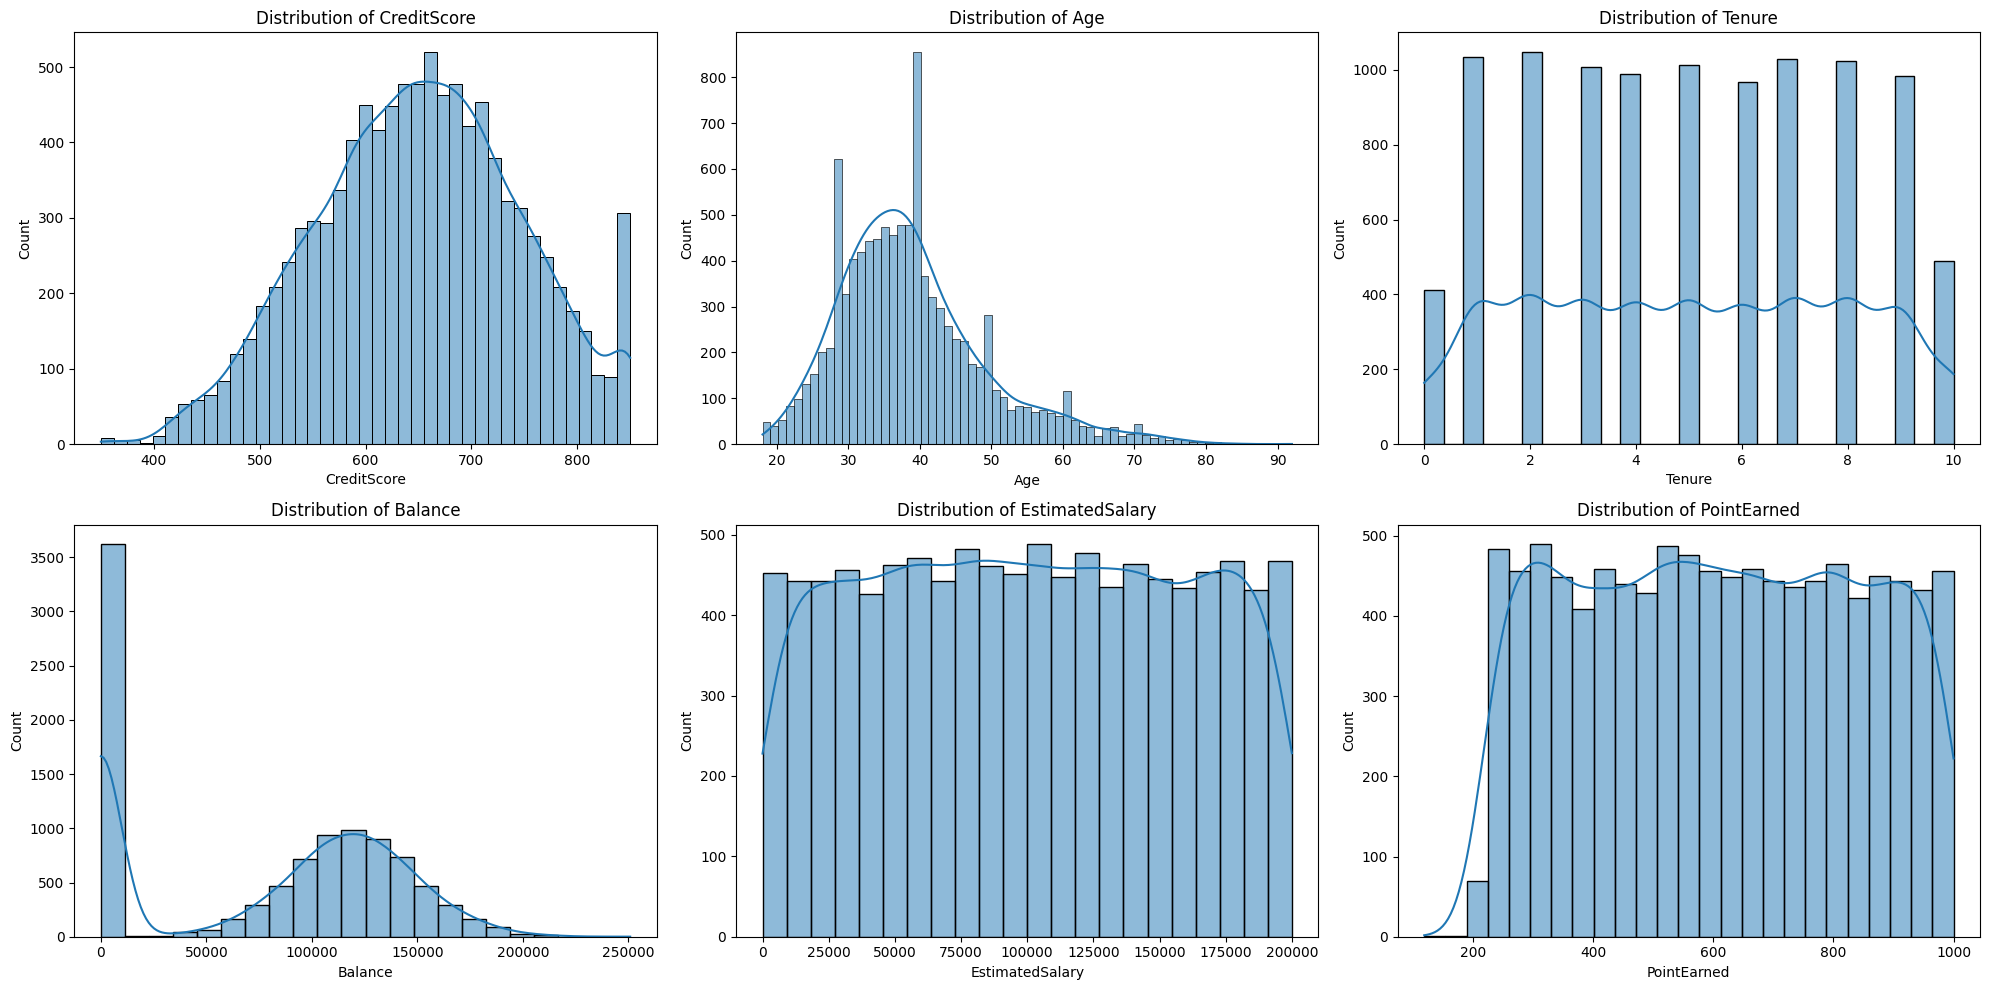

In [45]:
# visualization of numerical columns
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # flatten to make iteration easier

for i, col in enumerate(num_cols.columns):  # assuming num_cols is a DataFrame of numerical columns
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

##### 🧮 Categorical Columns

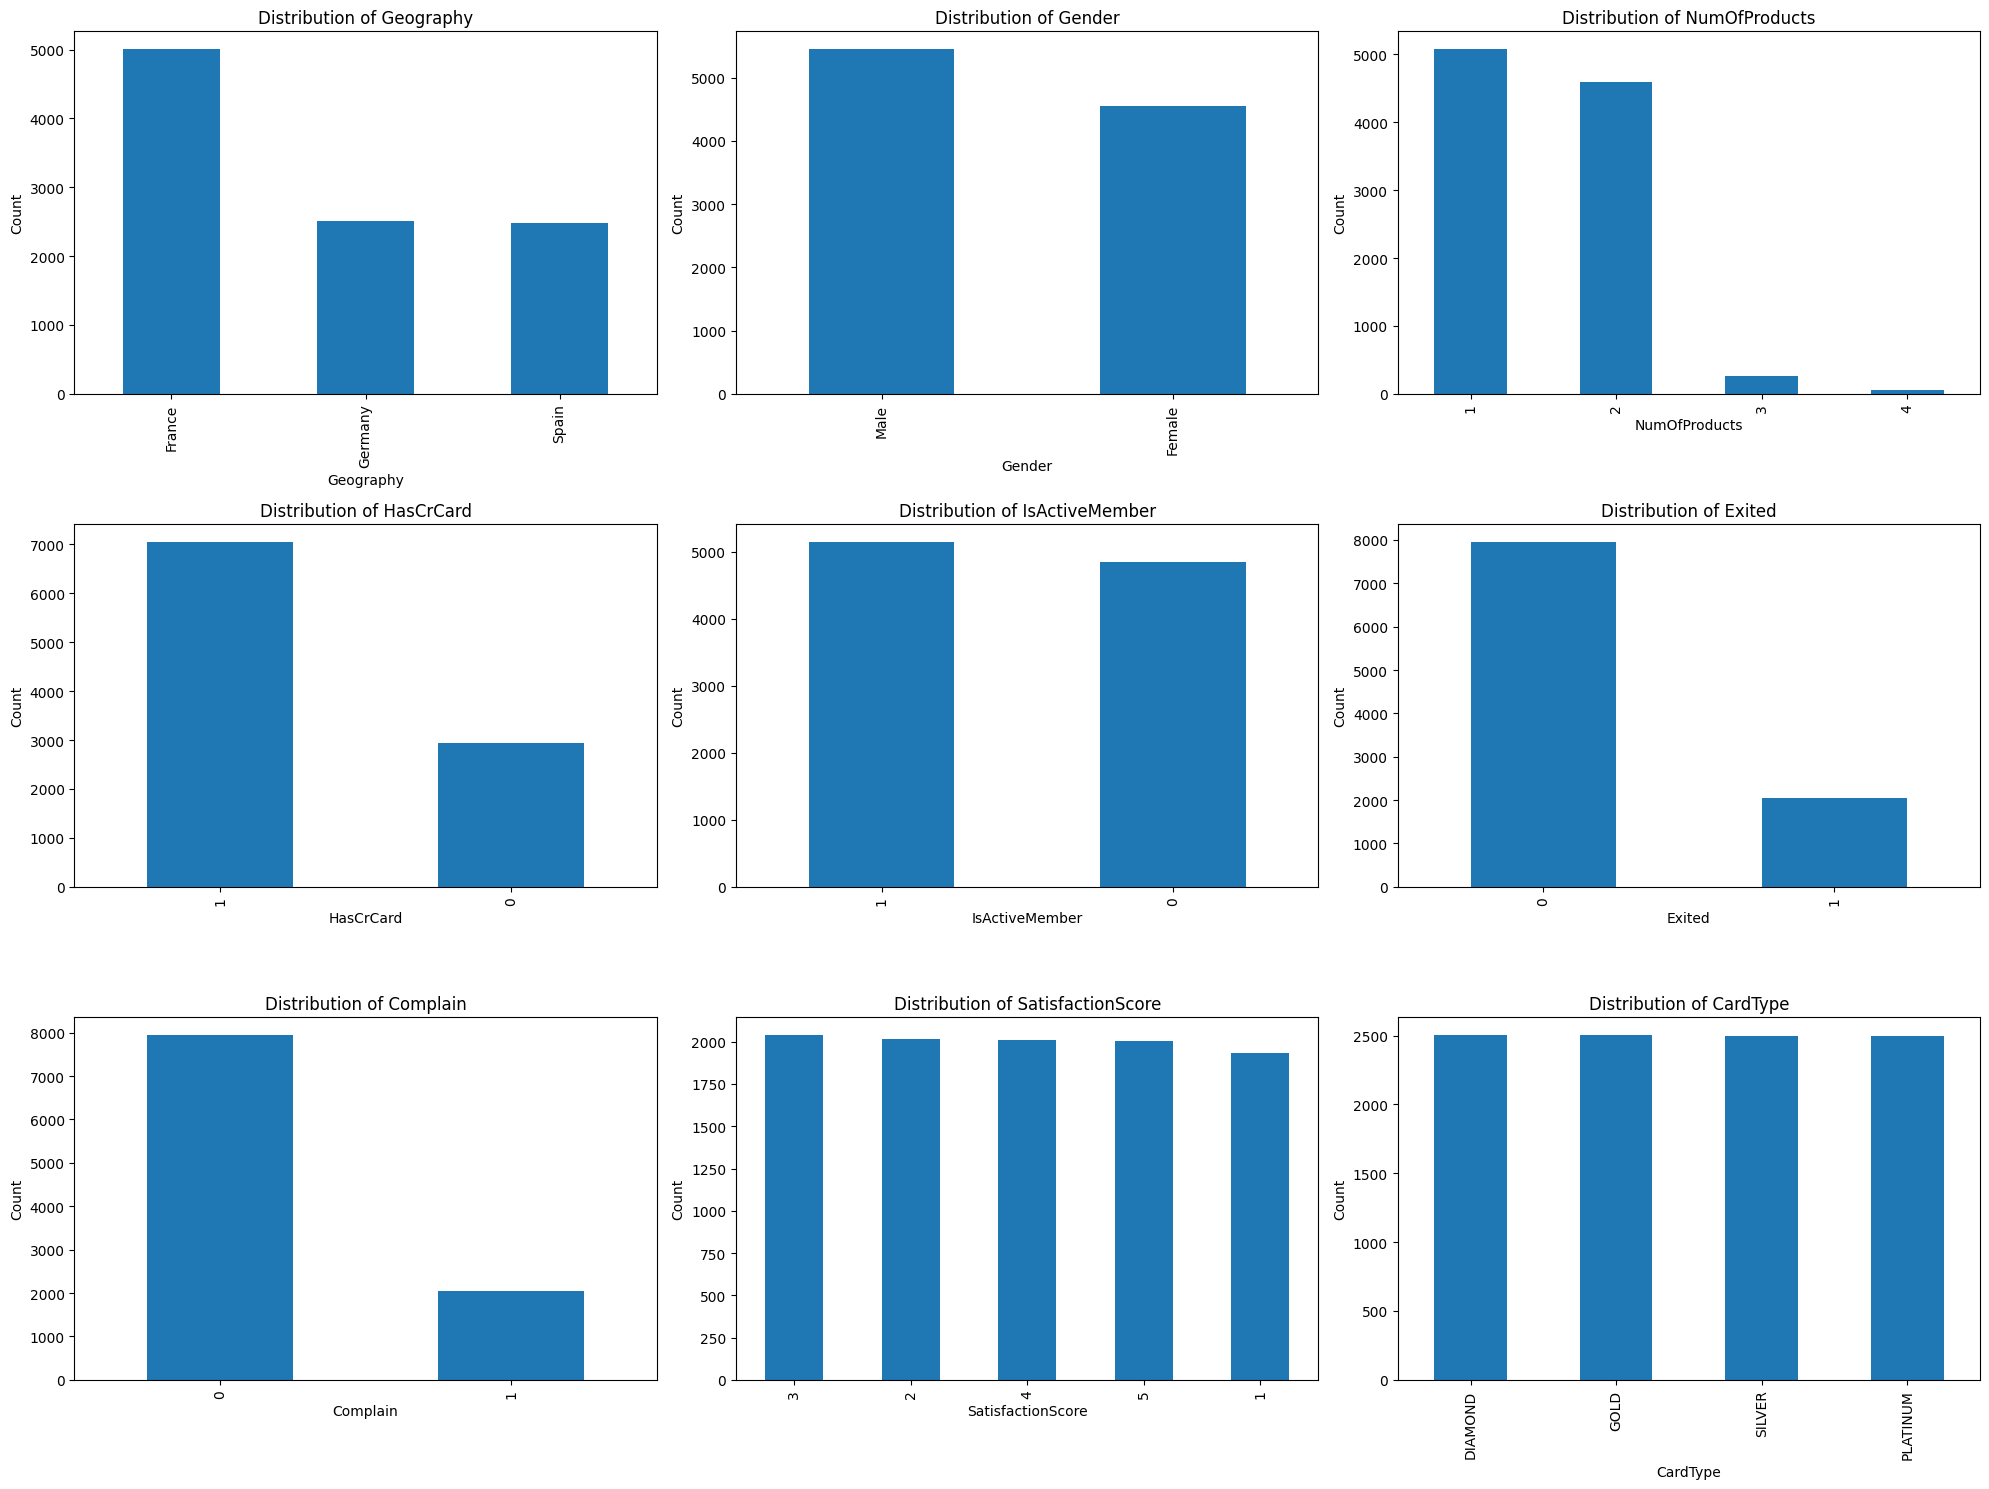

In [46]:
# visualization of numerical columns
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # flatten to make iteration easier

for i, col in enumerate(cat_cols.columns):  # assuming cat_cols is a DataFrame of categorical columns
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### 4️⃣ Bivariate Analysis (Feature vs Target)

**Goals:**
* Find variables that correlate with the target.
* Detect trends or class imbalances.

##### 📊 Numerical vs Target

In [47]:
target = 'Exited'

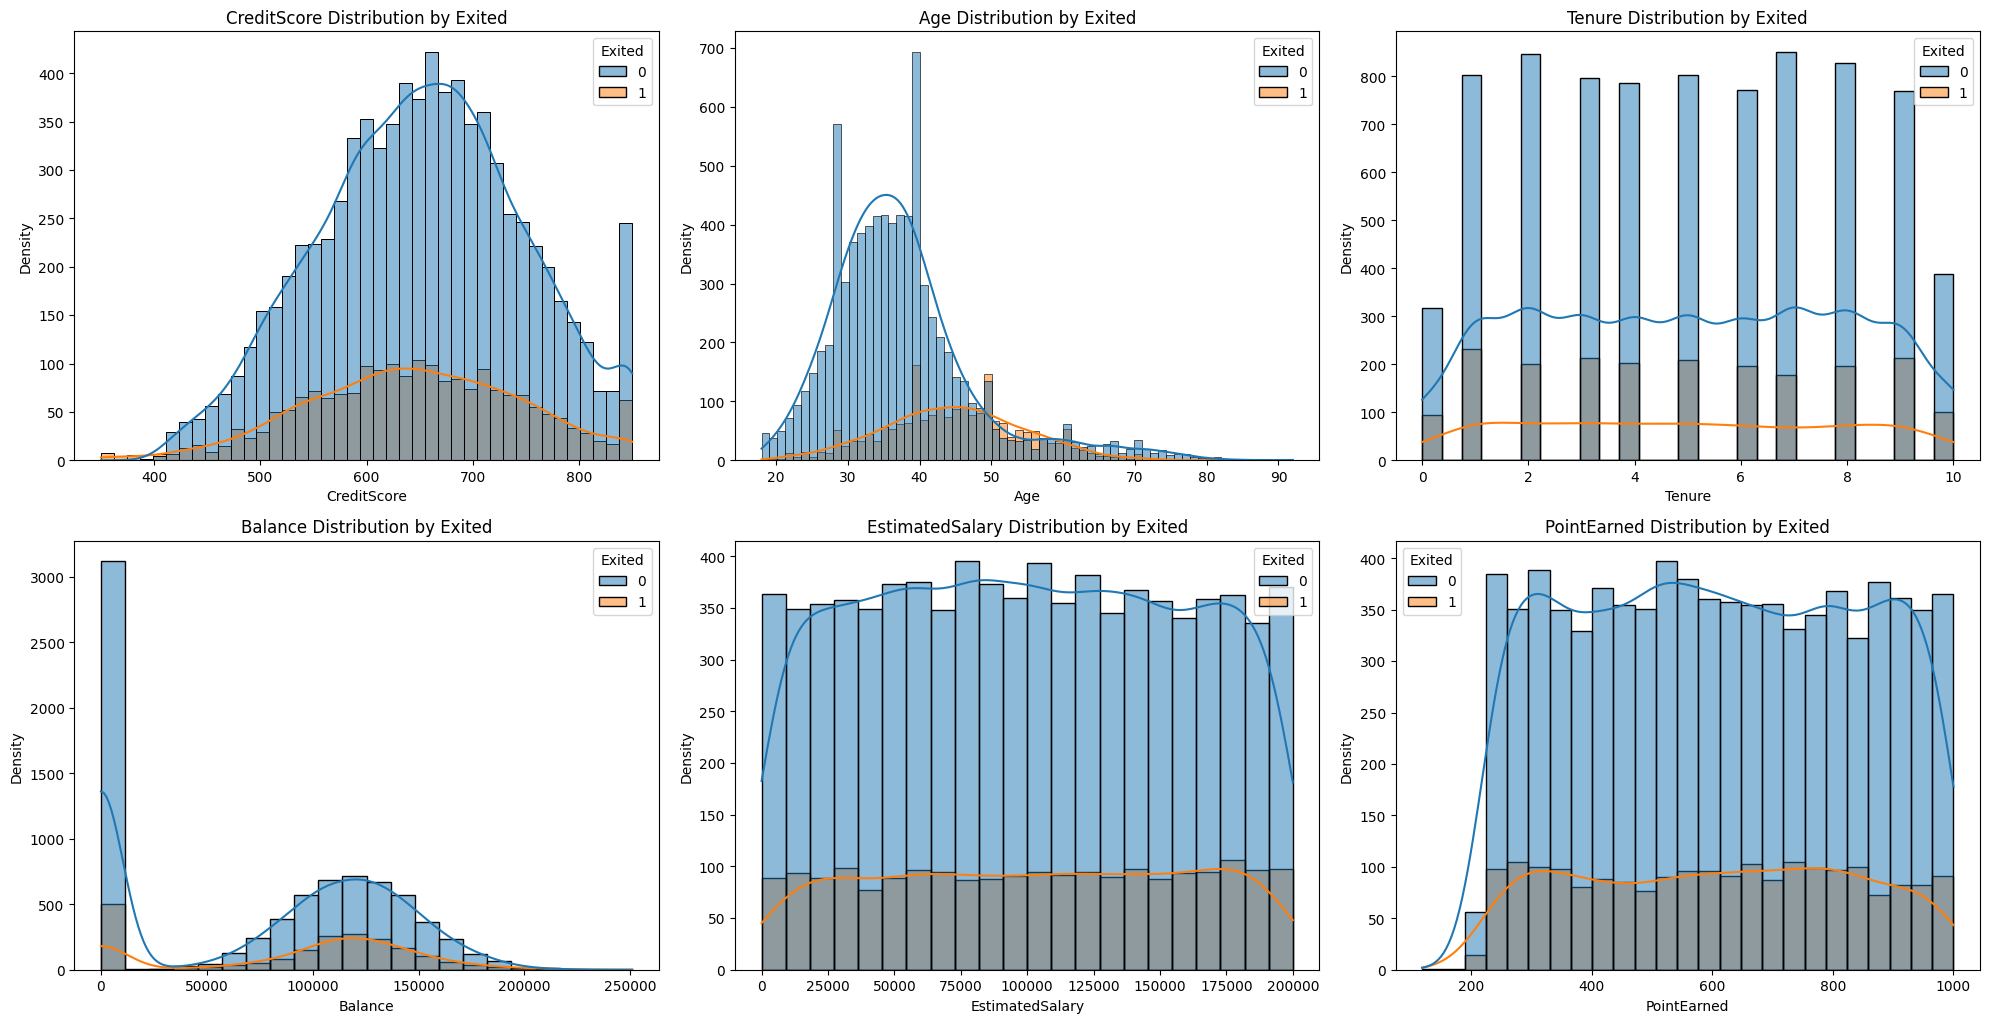

In [48]:
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    sns.histplot(data=data, x=col, hue='Exited', ax=axes[i], kde=True)
    axes[i].set_title(f'{col} Distribution by Exited')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### 🧮 Categorical vs Target

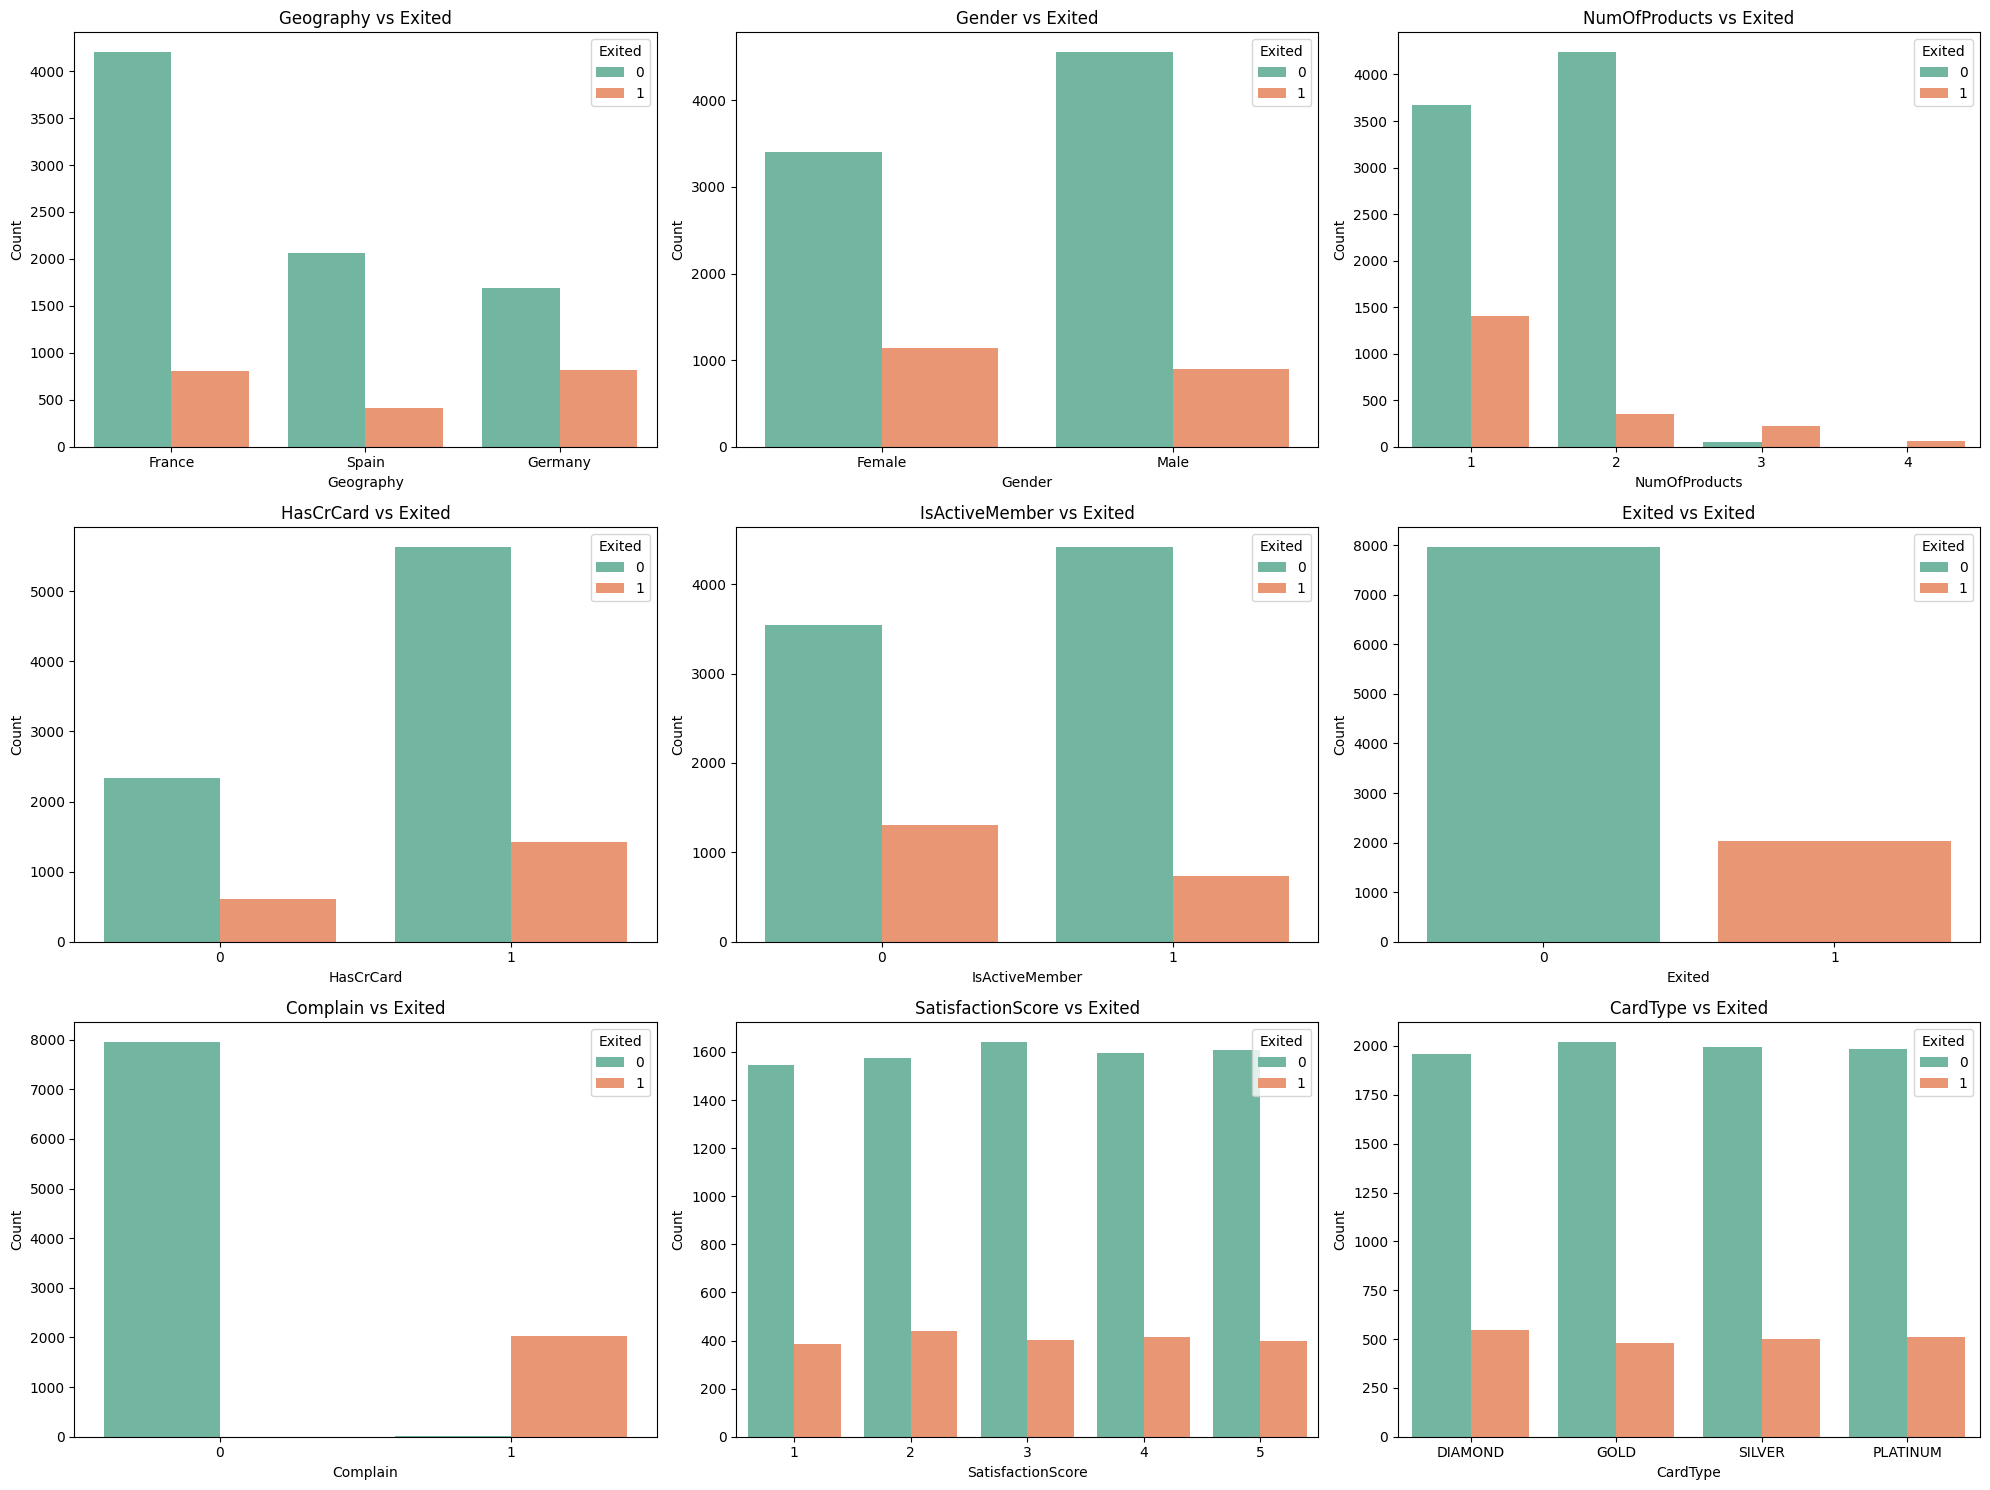

In [49]:
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols.columns):  # categorical columns
    sns.countplot(data=data, x=col, hue=target, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Exited')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Exited')

# Remove unused plots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


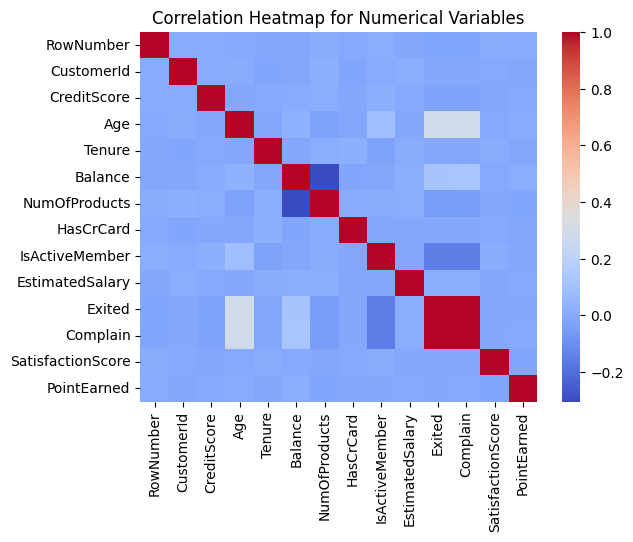

In [50]:
# Heatmap numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

corr = data[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()
